In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [17]:
# The datasets are already preprocessed...
dataset1 = pickle.load(open("../datasets/part2_dataset_1.data", "rb"))
dataset2 = pickle.load(open("../datasets/part2_dataset_2.data", "rb"))

In [18]:
TIMES = 3

def calc_confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    h = 1.96 * std / np.sqrt(n)
    return h

def get_min_kmeans_loss(dataset, k):
    min_loss = np.inf

    for _ in range(TIMES):
        km = KMeans(n_clusters=k)
        km.fit(dataset)
        min_loss = min(min_loss, km.inertia_)
    
    return min_loss

def calc_avg_kmeans_loss(dataset, k):
    losses = []

    for _ in range(TIMES):
        losses.append(get_min_kmeans_loss(dataset, k))

    return np.mean(losses), calc_confidence_interval(losses)

def get_min_silhouette_score(dataset, k):
    min_ss = np.inf

    for _ in range(TIMES):
        km = KMeans(n_clusters=k)
        y_pred = km.fit_predict(dataset)
        min_ss = min(min_ss, silhouette_score(dataset, y_pred))

    return min_ss

def calc_avg_silhouette_loss(dataset, k):
    scores = []

    for _ in range(TIMES):
        scores.append(get_min_silhouette_score(dataset, k))
    
    return np.mean(scores), calc_confidence_interval(scores)

k_rng = range(2, 11)
avg_losses = []
loss_conf_intervals = []
avg_silhouettes = []
silhouette_conf_intervals = []

for k in k_rng:
    avg_loss, conf_int = calc_avg_kmeans_loss(dataset2, k)
    avg_losses.append(avg_loss)
    loss_conf_intervals.append(conf_int)
    
    avg_silhouette, sil_conf_int = calc_avg_silhouette_loss(dataset2, k)
    avg_silhouettes.append(avg_silhouette)
    silhouette_conf_intervals.append(sil_conf_int)
    
    
loss_conf_intervals

[2.5309393556525097,
 0.0,
 1.0377161233228318,
 269.2892642325527,
 0.9698056582506771,
 2.400724457930526,
 101.75832296521259,
 23.172388536795623,
 17.109357799027904]

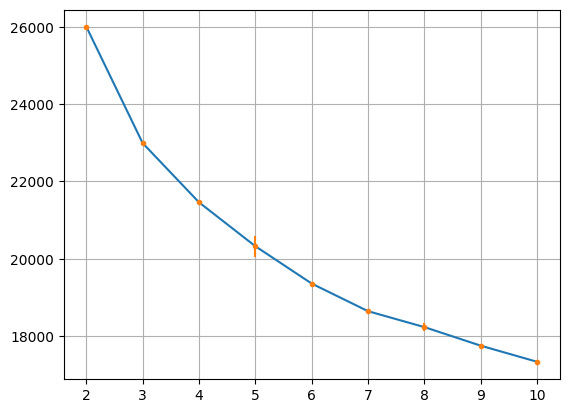

In [19]:
plt.plot(k_rng, avg_losses)
plt.errorbar(k_rng, avg_losses, yerr=loss_conf_intervals, fmt='.')
plt.grid()


[0.001193295019871752,
 0.0,
 0.00041858490292492645,
 0.005744032627825563,
 0.00045044928838295137,
 0.014470037411934951,
 0.015378914863490157,
 0.010168287411112828,
 0.002548392298807251]

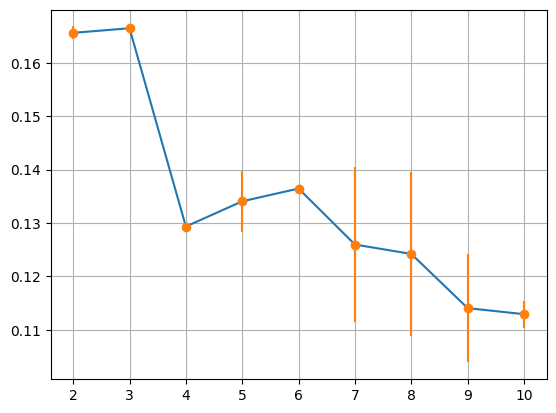

In [20]:
plt.plot(k_rng, avg_silhouettes)
plt.errorbar(k_rng, avg_silhouettes, yerr=silhouette_conf_intervals, fmt='o')
plt.grid()
plt.tight_layout
silhouette_conf_intervals